In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Importation de fichiers
erp = pd.read_csv('Fichier_erp.csv')
liaison = pd.read_csv('fichier_liaison.csv')
web = pd.read_csv('Fichier_web.csv')

In [3]:
#affichage erp
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


Dans chaque dataframe je vais faire cherche les clé ou valeur unique

In [12]:
erp['product_id'].nunique()

825

In [13]:
erp.duplicated().sum()

0

In [15]:
#liaison
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [16]:
erp['product_id'] = erp['product_id'].astype('object')

In [17]:
liaison['product_id'].nunique()

825

Clé : 'product_id'

In [18]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [19]:
liaison['product_id'] = liaison['product_id'].astype('object')

In [20]:
#doublons
liaison.duplicated().sum()

0

In [21]:
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

In [22]:
#web
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [24]:
web['sku'].nunique()

714

Dans l'etape suivante j'aimerais supprimer les doublons dans la colonne "sku" du web, en gardant la première occurrence et en triant les résultats par la colonne "post_type"=='product'.

Je peux utiliser keep='first' ou 'last' mais le plus conveniant pour moi c'est le 'first', pour quoi? simplement parce que 'first' signifie que pour chaque valeur dupliquée/doubloné dans la colonne "sku", seule la première occurrence sera conservée, et les occurrences suivantes seront marquées comme doublons (ce un approche pour garder la première entrée associée à chaque produit).



Pour quoi j'ai pris le trier par 'post_type'='product'? Dans la case suivante je vais vous montrer une example, je vais prendre le premier ligne du df web de la colonne "sku", donc c'est bien le produit '16004', on vais vérifier combien de fois se répete le produit par 'post_type'.

In [25]:
filas_16004 = web[web['sku'] == '16004']
print(filas_16004)

       sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0    16004        0             0             0             0.0          5.0   
581  16004        0             0             0             0.0          5.0   

    tax_status  tax_class  post_author            post_date  ...  \
0          NaN        NaN          2.0  2018-06-07 16:27:25  ...   
581    taxable        NaN          2.0  2018-06-07 16:27:25  ...   

                           post_name        post_modified  \
0    chateau-du-couvent-pomerol-2017  2020-08-25 18:35:02   
581  chateau-du-couvent-pomerol-2017  2020-08-25 18:35:02   

       post_modified_gmt post_content_filtered post_parent  \
0    2020-08-25 16:35:02                   NaN         0.0   
581  2020-08-25 16:35:02                   NaN         0.0   

                                                  guid menu_order   post_type  \
0    https://www.bottle-neck.fr/wp-content/uploads/...        0.0  attachment   
581  https://www.bott

Vu le résultat, je vais garde seulement le 'produit' pas les image de chaque produit.
Donc je vais vous montrer combien des doublons a web, s'il y a des nan avec celulle vide dans sku.
Si toutes les lignes dans sku = nan et elles sont complètement vides je vais les enlèver, mais d'abord je vais effacer le doublon de sku trier par son post type et garder que les produits.

In [27]:
web = web.loc[web.duplicated(subset="sku", keep="last")==True].sort_values("post_type")

In [28]:
web_nan_sku = web[web['sku'].isna()]
web_nan_sku

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vu les résultat, il y a des articles vides que doit être effacé per contre il y a deux(488 et 353)que sont avec des produits assigné que peut être sont vendus dans le boutique? pas en ligne

In [29]:
web = web.dropna(subset=['sku'])

In [30]:
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
808,15161,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-07-30 14:59:19,...,le-pas-de-lescalette-terrasses-du-larzac-pas-d...,2020-02-10 09:30:09,2020-02-10 08:30:09,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
332,15930,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-01-15 14:52:59,...,domaine-weinbach-riesling-colette-2018,2020-08-27 14:35:02,2020-08-27 12:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
327,12657,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-16 15:13:54,...,belliviere-jasnieres-rosiers-2015,2020-06-19 17:55:02,2020-06-19 15:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
326,15704,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-01-03 16:46:47,...,decelle-villa-saint-aubin-dumay-2015,2020-02-08 09:00:14,2020-02-08 08:00:14,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
364,15185,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
361,12588,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-02 10:00:02,...,champagne-egly-ouriet-extra-brut-vp,2020-08-27 11:45:02,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
386,15753,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-10-09 14:59:27,...,david-beaupere-julienas-bottiere-2018,2020-07-21 17:55:04,2020-07-21 15:55:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


La prochaine etape je vais voir les colonnes et choisir les nécessaires pour mieux visualisation.

In [31]:
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [32]:
# selection des colonnes nécessaire
web = web[["sku","total_sales","post_date_gmt","post_title","post_name", "post_type"]]
web

,sku,total_sales,post_date_gmt,post_title,post_name,post_type
0,16004,5.0,2018-06-07 14:27:25,Château du Couvent Pomerol 2017,chateau-du-couvent-pomerol-2017,attachment
808,15161,0.0,2019-07-30 12:59:19,Le Pas de l'Escalette Terrasses du Larzac Le P...,le-pas-de-lescalette-terrasses-du-larzac-pas-d...,attachment
332,15930,2.0,2019-01-15 13:52:59,Domaine Weinbach Riesling Cuvée Colette 2018,domaine-weinbach-riesling-colette-2018,attachment
327,12657,0.0,2018-02-16 14:13:54,Domaine de Bellivière Jasnières Les Rosiers 2015,belliviere-jasnieres-rosiers-2015,attachment
326,15704,0.0,2020-01-03 15:46:47,Decelle-Villa Saint-Aubin 1er Cru Sous Roche D...,decelle-villa-saint-aubin-dumay-2015,attachment
...,...,...,...,...,...,...
365,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product
364,15185,0.0,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,product
361,12588,0.0,2018-03-02 09:00:02,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,champagne-egly-ouriet-extra-brut-vp,product
386,15753,0.0,2018-10-09 12:59:27,David-Beaupère Juliénas La Bottière Vieilles V...,david-beaupere-julienas-bottiere-2018,product


Rappel:
Jointure: fusion de dataframe à partir de un clé.
-Inner/interne: combine les enregistrements qui ont une correspondance dans les deux tables
-Outer/externe: inclut touts les enregistrements d'au moins l'une des tables, même sans correspondance dans l'autre
-left/gauche: inclut touts les enregistremments de la table de gauche et leurs correspondances
-right/droite: inclut touts les enregistremments de la table de droite et leurs correspondances de la table gauche
-croisée
    

Maintenant je considere que mes dataframes sont propres.
Donc je vais procedere à faires le: 'Jointure'
D'abord la jointure à faire sera une jointure interne soit inner (avec l'utilisation du clé: 'product_id' vu que en haut les valeurs c'était unique dans le deux dataframe; erp et liaison. 

Je vous montre aussi le outer joint, le résultat serait donc le même, vu que les deux clé ont le même nombre de product_id 
Une fois fait, je vaire refaire un autre jointure avec le web et là sera par la droite pour rapprocher les sku tout en conservant les produits(la jointure est réalisée en utilisant seulement la clé de la dernière table).

In [35]:
newbd= pd.merge(erp, liaison, how="inner",on="product_id")
newbd1 = pd.merge(newbd, web, how="right",on="sku")
newbd1 = newbd1[newbd1["post_type"]=="product"]
newbd1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date_gmt,post_title,post_name,post_type
342,4159,1,9.3,0,outofstock,15668,3.0,2018-02-13 13:57:29,Planeta Sicilia La Segreta Bianco 2017,planeta-sicilia-segreta-bianco-2017,product
343,4394,1,59.8,0,outofstock,13766,0.0,2018-03-22 09:35:08,Wemyss Malts Blended Malt Scotch Whisky Treacl...,whisky-wemyss-treacle-chest,product
344,4188,1,9.5,99,instock,16265,8.0,2018-02-15 09:18:39,Château de La Liquière Languedoc Blanc Les Ama...,liquiere-languedoc-amandiers-blancs-2019,product
345,4913,1,28.0,16,instock,13814,0.0,2018-05-15 09:44:19,Jean-Batiste Arena Muscat du Cap Corse 2015,jean-batiste-arena-muscat-du-cap-corse-2015,product
346,4404,1,108.5,2,instock,3507,2.0,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,cognac-frapin-fontpinot-xo,product
...,...,...,...,...,...,...,...,...,...,...,...
709,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product
710,5767,1,175.0,12,instock,15185,0.0,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,product
711,4350,1,79.5,20,instock,12588,0.0,2018-03-02 09:00:02,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,champagne-egly-ouriet-extra-brut-vp,product
712,5483,1,17.9,22,instock,15753,0.0,2018-10-09 12:59:27,David-Beaupère Juliénas La Bottière Vieilles V...,david-beaupere-julienas-bottiere-2018,product


In [36]:
newbd= pd.merge(erp, liaison, how="outer",on="product_id")
newbd1 = pd.merge(newbd, web, how="left",on="sku")
newbd1 = newbd1[newbd1["post_type"]=="product"]
newbd1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date_gmt,post_title,post_name,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,product
6,4041,1,32.7,15,instock,14975,0.0,2018-02-12 08:45:14,Pierre Gaillard Condrieu 2018,pierre-gaillard-condrieu-2018,product
10,4046,1,80.0,0,outofstock,15269,6.0,2018-02-12 09:16:27,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,pierre-gaillard-cote-rotie-rose-pourpre-2017,product
...,...,...,...,...,...,...,...,...,...,...,...
785,6926,1,49.9,24,instock,15845,1.0,2020-04-25 10:43:23,Château Jean Faure Saint-Emilion Grand Cru 2016,chateau-jean-faure-saint-emilion-grand-cru-2016,product
786,6928,1,19.0,20,instock,15741,2.0,2020-04-25 10:49:49,Le Cèdre de Jean Faure Saint-Emilion 2016,cedre-de-jean-faure-saint-emilion-2016,product
792,7023,1,27.5,15,instock,15891,0.0,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product
793,7025,1,69.0,2,instock,15887,0.0,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product


In [35]:
newbd= pd.merge(erp, liaison, how="inner",on="product_id")
newbd1 = pd.merge(newbd, web, how="right",on="sku")
newbd1 = newbd1[newbd1["post_type"]=="product"]
newbd1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date_gmt,post_title,post_name,post_type
342,4159,1,9.3,0,outofstock,15668,3.0,2018-02-13 13:57:29,Planeta Sicilia La Segreta Bianco 2017,planeta-sicilia-segreta-bianco-2017,product
343,4394,1,59.8,0,outofstock,13766,0.0,2018-03-22 09:35:08,Wemyss Malts Blended Malt Scotch Whisky Treacl...,whisky-wemyss-treacle-chest,product
344,4188,1,9.5,99,instock,16265,8.0,2018-02-15 09:18:39,Château de La Liquière Languedoc Blanc Les Ama...,liquiere-languedoc-amandiers-blancs-2019,product
345,4913,1,28.0,16,instock,13814,0.0,2018-05-15 09:44:19,Jean-Batiste Arena Muscat du Cap Corse 2015,jean-batiste-arena-muscat-du-cap-corse-2015,product
346,4404,1,108.5,2,instock,3507,2.0,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,cognac-frapin-fontpinot-xo,product
...,...,...,...,...,...,...,...,...,...,...,...
709,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product
710,5767,1,175.0,12,instock,15185,0.0,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,product
711,4350,1,79.5,20,instock,12588,0.0,2018-03-02 09:00:02,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,champagne-egly-ouriet-extra-brut-vp,product
712,5483,1,17.9,22,instock,15753,0.0,2018-10-09 12:59:27,David-Beaupère Juliénas La Bottière Vieilles V...,david-beaupere-julienas-bottiere-2018,product


# Analysis de chiffre d'affaires et univarié de prix
D'abord je vais créér une colonne: "chiffre_d_affaire"
Après je vais le visualiser, faire le calcule de chiffre d'affaire par produit et ensuite le total de chiffre d'affaires.

In [31]:
newbd1["chiffre_d_affaire"] = newbd1["price"] * newbd1["total_sales"]
newbd1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date_gmt,post_title,post_name,post_type,chiffre_d_affaire
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product,42.0
710,7023,1,27.5,15,instock,15891,0.0,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product,0.0
711,7025,1,69.0,2,instock,15887,0.0,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product,0.0
712,7247,1,54.8,23,instock,13127-1,0.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0


In [32]:
print(newbd1.groupby("post_name")[["chiffre_d_affaire"]].prod())

                                                    chiffre_d_affaire
post_name                                                            
8planeta-sicilia-etna-rosso-2018                                  0.0
agnes-levet-amethyste-2017                                      164.8
agnes-levet-cote-rotie-maestria-2017                            165.0
agnes-levet-cote-rotie-peroline-2017                            171.0
alain-graillot-crozes-hermitage-blanc-2018                      244.0
...                                                               ...
zind-humbrecht-pinot-gris-windsbuhl-2013                          0.0
zind-humbrecht-riesling-clos-windsbuhl-2014                       0.0
zind-humbrecht-riesling-gc-rangen-thann-clos-st...                0.0
zind-humbrecht-riesling-herrenweg-turckheim-2017                 63.4
zind-humbrecht-vdf-zind-2017                                    154.2

[714 rows x 1 columns]


In [33]:
#total CA
total_ca = newbd1["chiffre_d_affaire"].sum()
print ("Le total de chiffre d'affaire est de", total_ca, "euros")

Le total de chiffre d'affaire est de 70568.6 euros


In [34]:
# Analyse univarie des prix, (describe résumé statistique basique du prix)
newbd1[["price"]].describe()


,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


Rappel:
Mode: valeur plus fréquent
Médianne: valeur du milieu dans un ensemble de données trié
Moyenne: total des valeurs divisé par le total de nombre de valeurs

    

In [35]:
#verification plus precise
mediane_prix = newbd1['price'].median()
mode_prix = newbd1['price'].mode()
variance_prix = newbd1['price'].var()
ecart_type_prix = newbd1['price'].std()
print("La Médiane du prix :", mediane_prix)
print("Mode du prix :", mode_prix)
print("Variance du prix :", variance_prix)
print("Écart type du prix :", ecart_type_prix)

La Médiane du prix : 23.55
Mode du prix : 0    19.0
Name: price, dtype: float64
Variance du prix : 773.425296455189
Écart type du prix : 27.810524922323726


# Conclusion concernant le prix:
Nous avons donc 714 valeurs avec 5,20€ pour le prix minimum et 225€ pour le prix maximum.
Nous avons aussi les premier et troisème percentiles ainsi que la médiane (second percentil, 50%) à 25,90€.
l'écart type est de 26,40€
La moyenne de 32,80€. On note qu'elle est différente de la médiane.

Maintenant je vous presente le même résultat mais en forme des graphiques, le premièr un histogramme et en dernièr le boxplot avec leurs valeurs aberrantes.



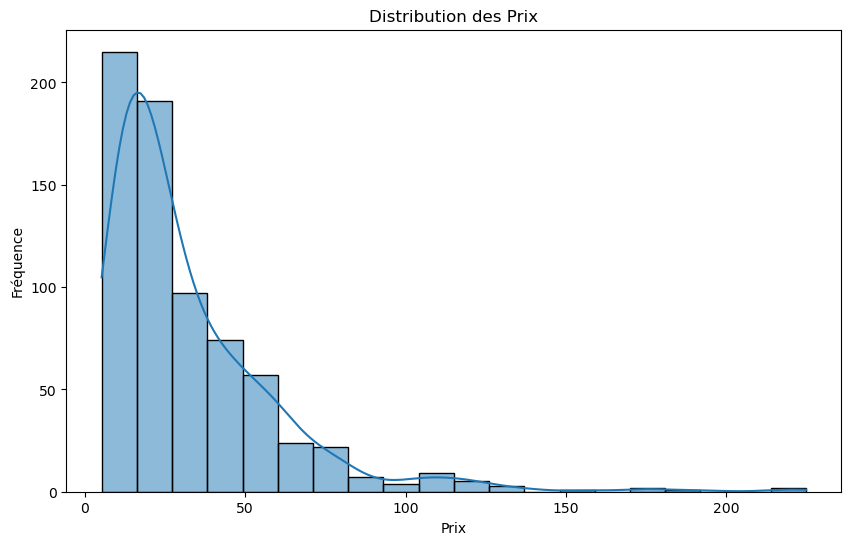

In [36]:
#Graphique des prix (histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(newbd1['price'], bins=20, kde=True)
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

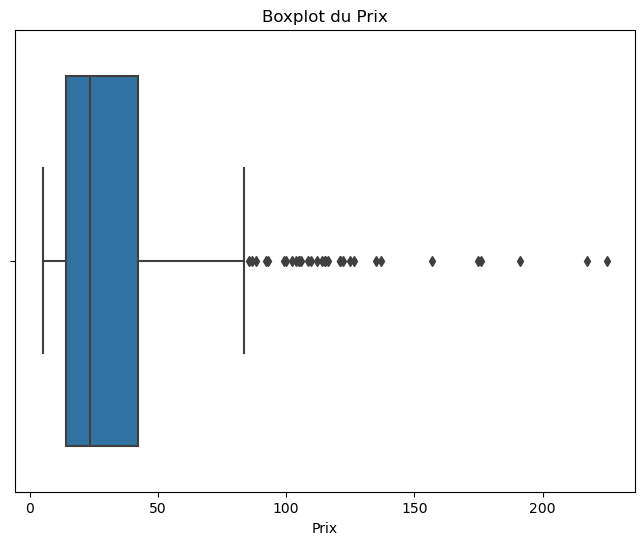

In [37]:
#Graphique des prix (boxplot), ici on vais vérifier les valeurs abérantes
plt.figure(figsize=(8, 6))
sns.boxplot(x=newbd1['price'])
plt.title('Boxplot du Prix')
plt.xlabel('Prix')
plt.show()

Valeur aberrante: est une observation qui diffère significativement du reste des données dans un ensemble.
Il y a plusierus méthode:
- Méthode de la place interquartile (IQR)
- Z-score
- Méthode graphiques
- Méthode basée sur les modèles

In [26]:
# valeurs aberrantes:
Q1 = newbd1["price"].quantile(q=0.25, interpolation="midpoint")
Q3 = newbd1["price"].quantile(q=0.75, interpolation="midpoint")
IQR = Q3 - Q1

Lim_Outliers_Inf = Q1-1.5*IQR
Lim_Outliers_Sup = Q3+1.5*IQR

Outliers_Inf = newbd1["price"] < Lim_Outliers_Inf
Outliers_Sup = newbd1["price"] > Lim_Outliers_Sup

print("le limite des  valeurs abérrants inferieurs est de:", round(Lim_Outliers_Inf,2))
print("le limite des  valeurs abérrants superieurs est de", round(Lim_Outliers_Sup,2))
print("Les index des valeurs aberrantes superieurs sont:", np.where(Outliers_Sup)[0])
print("\n",newbd1.loc[(newbd1["price"]>84.05),("price","post_name")].sort_values(by="price", ascending=True))

le limite des  valeurs abérrants inferieurs est de: -27.98
le limite des  valeurs abérrants superieurs est de 84.22
Les index des valeurs aberrantes superieurs sont: [ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]

      price                                          post_name
205   85.6  champagne-larmandier-bernier-grand-cru-vieille...
438   86.8  champagne-agrapart-fils-mineral-extra-brut-bla...
65    88.4  zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
502   92.0                      tempier-bandol-cabassaou-2017
602   93.0       wemyss-malts-single-cask-chocolate-moka-cake
655   99.0  domaine-des-comtes-lafon-volnay-1er-cru-champa...
63   100.0  zind-humbrecht-riesling-gc-rangen-thann-clos-s...
380  102.3  domaine-des-croix-corton-grand-cru-les-greves-...
222  104.0                          cognac-frapin-cigar-blend
432  105.0  domaine-des-comtes-lafon-volnay-1er-cru-santen...
431  105.0  domaine

In [45]:
valeurs_aberrantes=newbd1.loc[(newbd1["price"]>84.05),("price","post_name")].sort_values(by="price", ascending=True)
print("Le total des valeurs aberrantes est de:", (len(valeurs_aberrantes)), 'per contre elles sont pas adherèntes parce que sur internet on peut voir que les prix sont pareils.')
      

Le total des valeurs aberrantes est de: 32 per contre elles sont pas adherèntes parce que sur internet on peut voir que les prix sont pareils.


In [46]:
# Pour finaliser et comme extra je créé la colonne Z-Score basé sur le prix (# Z-Score est aussi appelé score standard. 
#Cette valeur/score aide à comprendre à quelle distance se trouve le point de données de la moyenne
newbd1["Z-Score : Price"] = stats.zscore(newbd1["price"])
newbd1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date_gmt,post_title,post_name,post_type,chiffre_d_affaire,Z-Score : Price
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,145.2,-0.298410
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,0.065016
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,-0.420752
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,42.3,-0.661837
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,0.486015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product,42.0,-0.866939
710,7023,1,27.5,15,instock,15891,0.0,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,-0.179667
711,7025,1,69.0,2,instock,15887,0.0,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,1.313620
712,7247,1,54.8,23,instock,13127-1,0.0,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0,0.802664


In [47]:
# Z score (new colonne apart):
 
z = np.abs(stats.zscore(newbd1["price"]))
print(z)

0      0.298410
1      0.065016
2      0.420752
3      0.661837
4      0.486015
         ...   
709    0.866939
710    0.179667
711    1.313620
712    0.802664
713    0.582675
Name: price, Length: 714, dtype: float64


<Axes: ylabel='Density'>

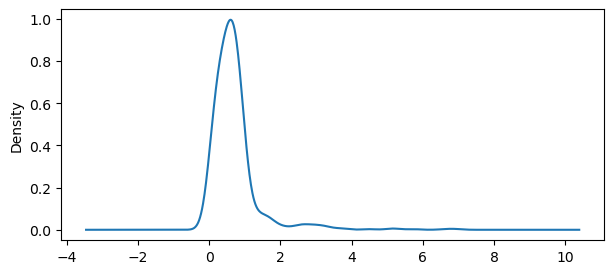

In [48]:
# Graphique de densité du Z-Score
z.plot(kind="density", y="Z-Score : Price", figsize=(7,3))